In [6]:
%load_ext autoreload
%autoreload 2
import se2_flow
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
v = 5
omega = np.pi/4
x0 = np.array([0,0,0])
ut = v
omega_t = np.array([0,omega,0,omega,0,omega,0,omega])
t = np.linspace(0,16,1600)
n = 10

TEB = 1.476 # HJB w/ control bound [-pi,pi]
r_small = 1.4487 # lyapunov w/ small theta_max
r_large = 2.1136 # lyapunov w/ large theta_max


xr = se2_flow.traj(x0, ut, omega_t, t)

flow_pipes_s, intervalhull_s, nom = se2_flow.flowpipes_test(xr,r_small,t, n)
flow_pipes_l, intervalhull_l, nom = se2_flow.flowpipes_test(xr,r_large,t, n)
flow_pipes_H, intervalhull_H, nom = se2_flow.flowpipes_test(xr,TEB,t, n)




NameError: name 'take' is not defined

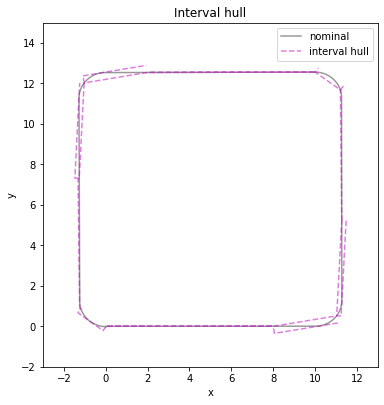

In [13]:
plt.figure(figsize=(9/1.5,9.5/1.5))
ax = subplot(111)
h_nom = ax.plot(nom[:,0], nom[:,1], color='k', linestyle='-', alpha = 0.4)
for facet in range(n):
    hs_ch_s = ax.plot(intervalhull_s[facet][:,0], intervalhull_s[facet][:,1], color='m', linestyle='--', alpha =0.5)
    #hs_ch_l = ax.plot(intervalhull_l[facet][:,0], intervalhull_l[facet][:,1], color='y', linestyle='--')


title('Interval hull')
xlabel('x')
ylabel('y')
legend([h_nom[0], hs_ch_s[0]], ['nominal', 'interval hull'], loc=1);
plt.xlim([-3, 13]);
plt.ylim([-2, 15]);




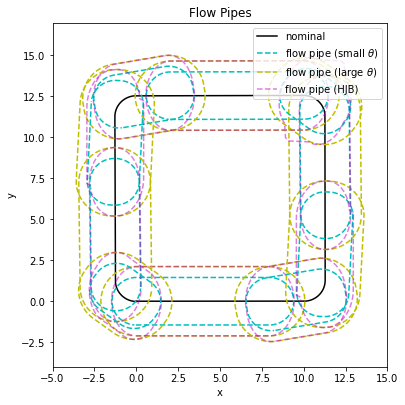

In [14]:
plt.figure(figsize=(9/1.5,9.5/1.5))
ax = subplot(111)
h_nom = ax.plot(nom[:,0], nom[:,1], color='k', linestyle='-')
for facet in range(n):
    hs_ch_s = ax.plot(flow_pipes_s[facet][:,0], flow_pipes_s[facet][:,1], color='c', linestyle='--')
    hs_ch_l = ax.plot(flow_pipes_l[facet][:,0], flow_pipes_l[facet][:,1], color='y', linestyle='--')
    hs_ch_H = ax.plot(flow_pipes_H[facet][:,0], flow_pipes_l[facet][:,1], color='m', linestyle='--', alpha = 0.5)

title('Flow Pipes')
xlabel('x')
ylabel('y')
legend([h_nom[0], hs_ch_s[0], hs_ch_l[0], hs_ch_H[0]], ['nominal', 'flow pipe (small $\\theta$)', 'flow pipe (large $\\theta$)','flow pipe (HJB)'], loc=1);
plt.xlim([-5, 15]);
plt.ylim([-4, 17]);